In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\polpi\Desktop\data science\assignments\KNN\Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [2]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [3]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

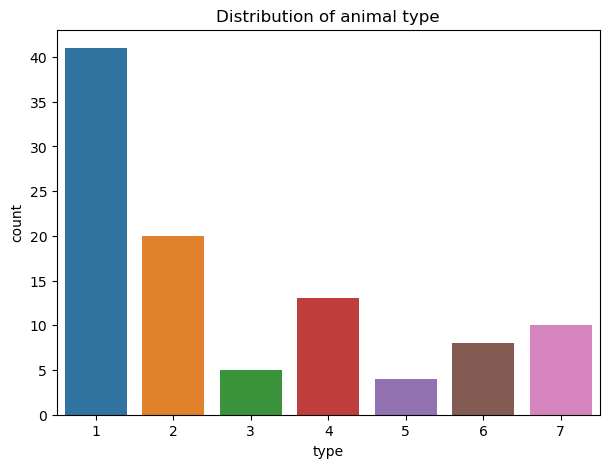

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.countplot(x='type',data=df)
plt.title('Distribution of animal type')
plt.show()

C:\Users\polpi\AppData\Local\Temp\ipykernel_31164\751183037.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=False,cmap='coolwarm')


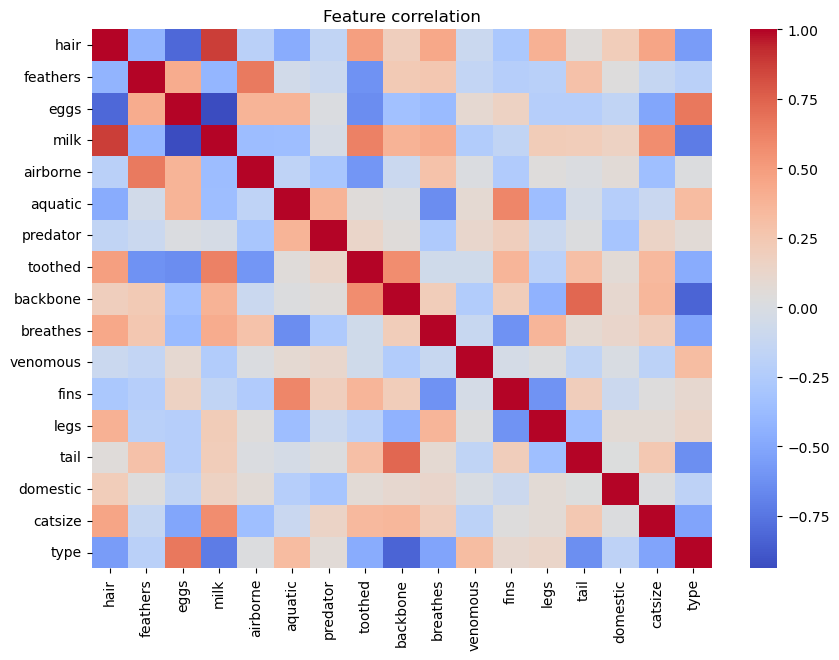

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=False,cmap='coolwarm')
plt.title('Feature correlation')
plt.show()

In [8]:
from scipy import stats
df['legs_zscore']=stats.zscore(df['legs'])
outliers=df[df['legs_zscore'].abs()>3]
print("Outliers in 'legs':\n",outliers)

Outliers in 'legs':
 Empty DataFrame
Columns: [animal name, hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, tail, domestic, catsize, type, legs_zscore]
Index: []


In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split as tts
x= df.drop(['type','animal name'], axis=1)
y=df['type']
x_train,x_test,y_train,y_test=tts(x,y,train_size=0.8,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((80, 17), (21, 17), (80,), (21,))

In [10]:
import numpy as np
x_train=np.ascontiguousarray(x_train)
x_test=np.ascontiguousarray(x_test)
y_train=np.ascontiguousarray(y_train)
y_test=np.ascontiguousarray(y_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
neighbors=np.arange(1,9)
train_acc=np.empty(len(neighbors))
test_acc=np.empty(len(neighbors))

In [12]:
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
model=knn.fit(x_train,y_train)

In [14]:
train_acc[i]=knn.score(x_train,y_train)
train_acc[i]

0.825

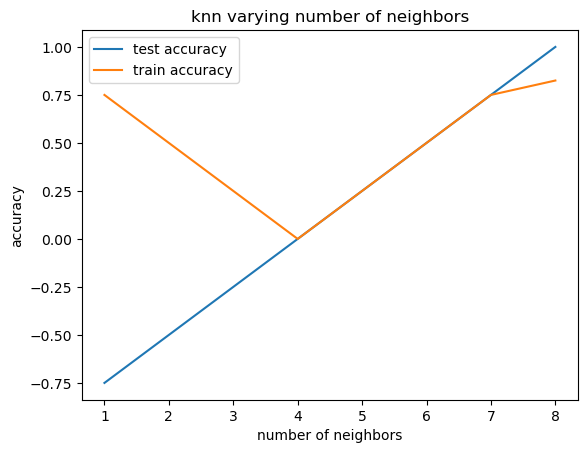

In [15]:
plt.title("knn varying number of neighbors")
plt.plot(neighbors, test_acc, label='test accuracy')
plt.plot(neighbors, train_acc, label='train accuracy')
plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.show()

In [16]:
predict=model.predict(x_test)
confusion_matrix(y_test,predict)

array([[11,  0,  0,  1,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  1,  0,  0]], dtype=int64)

In [17]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.40      1.00      0.57         2
           6       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         1

    accuracy                           0.86        21
   macro avg       0.57      0.65      0.59        21
weighted avg       0.85      0.86      0.84        21



C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
accuracy = accuracy_score(y_test, predict)
precision = precision_score(y_test, predict, average='weighted')
recall = recall_score(y_test, predict, average='weighted')
f1 = f1_score(y_test, predict, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

print('')
print(f"An accuracy of {accuracy} is good and shows that our model is able to predict efficiently")

Accuracy: 0.8571428571428571
Precision: 0.8476190476190476
Recall: 0.8571428571428571
F1 Score: 0.8391008577343981

An accuracy of 0.8571428571428571 is good and shows that our model is able to predict efficiently


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
print("The key hyperparameters of KNN:\nK number of neighbors-number of nearest neighbors k. Higher the k gives better predictions but increases bias\nwhile lower k value compromise the predictions (overfitting)")
print("Distance metric: This determines how distance between the neighbours will be calculated.")
print("Weights: This hyperparameter determines the influence of each neighbour.")
print("Algorithms: brute, kd_tree, ball_tree are few types of algorithms used in KNN according to datasets")
print("")
print("There are several types of Distance metrics that can be used.\nHere we have used 'Euclidean distance'. \nThe other types are Manhattan Distance, Minkowski Distance and Hamming Distance")


The key hyperparameters of KNN:
K number of neighbors-number of nearest neighbors k. Higher the k gives better predictions but increases bias
while lower k value compromise the predictions (overfitting)
Distance metric: This determines how distance between the neighbours will be calculated.
Weights: This hyperparameter determines the influence of each neighbour.
Algorithms: brute, kd_tree, ball_tree are few types of algorithms used in KNN according to datasets

There are several types of Distance metrics that can be used.
Here we have used 'Euclidean distance'. 
The other types are Manhattan Distance, Minkowski Distance and Hamming Distance
